<a href="https://colab.research.google.com/github/gayatri1405/Heart-Disease-Prediction/blob/main/predicting_heart_disease_using_logistic_regression_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('framingham.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from seaborn import countplot
from sklearn import preprocessing, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 1-Importing Dataset

In [ ]:
df = pd.read_csv("framingham.csv")

In [ ]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# 2- Cleaning Dataset

## 2-1- Deleting Extra Columns

In [ ]:
df1 = df.drop('education', axis=1)

## 2-2- Dropping Nan Values

In [ ]:
df1.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
df1.dropna(inplace=True)

In [ ]:
df1.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# 3- Plotting

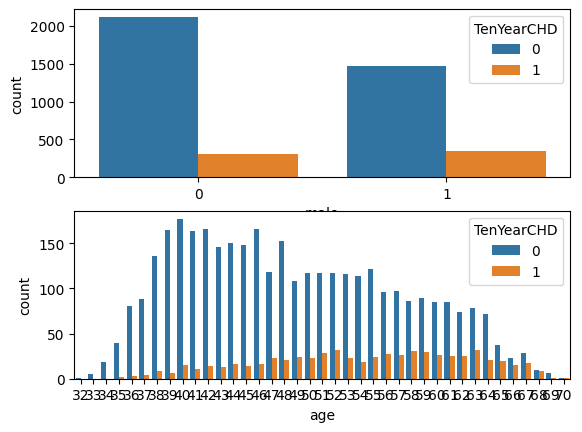

In [ ]:
fig, ax = plt.subplots(2)
sns.countplot(x='male',hue='TenYearCHD',data=df, ax=ax[0])
sns.countplot(x='age',hue='TenYearCHD', data=df, ax=ax[1])
plt.show()

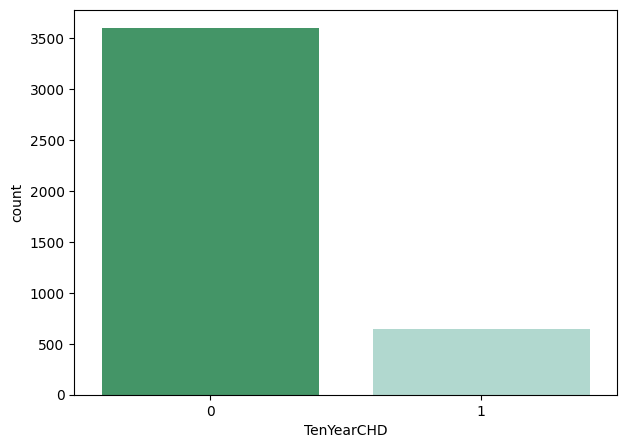

In [ ]:
# counting no. of patients affected with CHD
plt.figure(figsize=(7, 5))
sns.countplot(x='TenYearCHD', data=df,palette="BuGn_r")
plt.show()

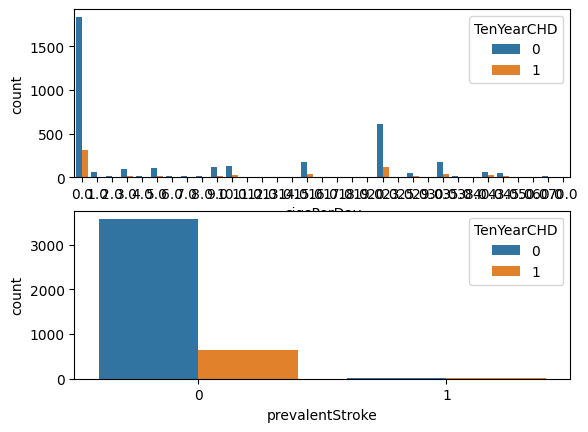

In [ ]:
fig, ax = plt.subplots(2)
sns.countplot(x='cigsPerDay',hue='TenYearCHD',data=df, ax=ax[0])
sns.countplot(x='prevalentStroke',hue='TenYearCHD', data=df, ax=ax[1])
plt.show()

# 4- Defining X(features) and y(label)

In [ ]:
X = df1[["male","age","currentSmoker","cigsPerDay","BPMeds","prevalentStroke","prevalentHyp","diabetes","totChol","sysBP","diaBP","BMI","heartRate","glucose"]]
y = df1[["TenYearCHD"]]

# 5- Normalizing dataset

## 5-1- Before Normalization

In [ ]:
X.mean()

male                 0.445215
age                 49.573447
currentSmoker        0.488403
cigsPerDay           9.008531
BPMeds               0.030392
prevalentStroke      0.005599
prevalentHyp         0.311917
diabetes             0.027193
totChol            236.928019
sysBP              132.368435
diaBP               82.938550
BMI                 25.808288
heartRate           75.704079
glucose             81.880032
dtype: float64

In [ ]:
X.std()

male                0.497056
age                 8.570204
currentSmoker       0.499932
cigsPerDay         11.925097
BPMeds              0.171686
prevalentStroke     0.074623
prevalentHyp        0.463338
diabetes            0.162666
totChol            44.611594
sysBP              22.046522
diaBP              11.932779
BMI                 4.065599
heartRate          11.956382
glucose            23.882233
dtype: float64

## 5-2- Normalization

In [ ]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.fit_transform(X)

## 5-3- After Normalization

In [ ]:
X.mean()

2.070172498215625e-17

In [ ]:
X.std()

0.9999999999999999

# 6- Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 7- Modeling

In [ ]:
LR = LogisticRegression().fit(X_train, y_train.values.ravel())

 # 8- Predicting

In [ ]:
y_pred = LR.predict(X_test)

# 9- Confusiosn Matrix

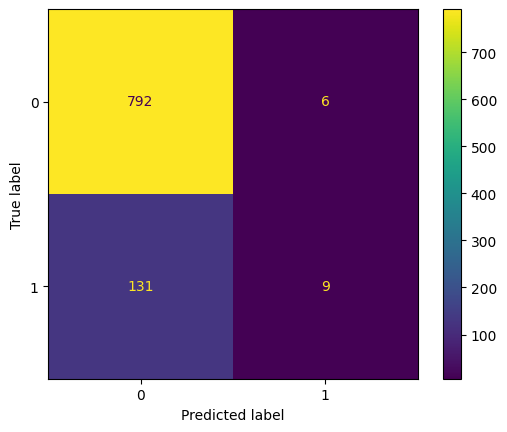

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

# 10- Checking Accuracy

In [ ]:
accuracy_score(y_test, y_pred)

0.8539445628997868

# 11- Checking The Probablity of Heart Disease for Test Set

In [ ]:
y_pred_prob = LR.predict_proba(X_test)

In [ ]:
y_pred_prob

array([[0.94274392, 0.05725608],
       [0.77875259, 0.22124741],
       [0.95848893, 0.04151107],
       ...,
       [0.86524412, 0.13475588],
       [0.87101439, 0.12898561],
       [0.65107217, 0.34892783]])

Validating the model

In [ ]:
import numpy as np

# Get input manually from the user for each feature
male = float(input("Enter your gender (0 for female, 1 for male): "))
age = float(input("Enter your age: "))
currentSmoker = float(input("Are you a current smoker? (0 for no, 1 for yes): "))
cigsPerDay = float(input("Enter the number of cigarettes per day: "))
BPMeds = float(input("Are you taking blood pressure medication? (0 for no, 1 for yes): "))
prevalentStroke = float(input("Have you had a prevalent stroke? (0 for no, 1 for yes): "))
prevalentHyp = float(input("Do you have prevalent hypertension? (0 for no, 1 for yes): "))
diabetes = float(input("Do you have diabetes? (0 for no, 1 for yes): "))
totChol = float(input("Enter your total cholesterol: "))
sysBP = float(input("Enter your systolic blood pressure: "))
diaBP = float(input("Enter your diastolic blood pressure: "))
BMI = float(input("Enter your BMI: "))
heartRate = float(input("Enter your heart rate: "))
glucose = float(input("Enter your glucose level: "))

# Create a NumPy array with the user input
user_input = np.array([[male, age, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp,
                        diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose]])

# Use the trained model to make predictions
predicted_outcome = LR.predict(user_input)

print(f"Predicted Outcome: {predicted_outcome}")

# Display result based on the predicted outcome
if predicted_outcome == 0:
    print("You don't have heart disease.")
else:
    print("You have heart disease.")


Enter your gender (0 for female, 1 for male): 1
Enter your age: 12
Are you a current smoker? (0 for no, 1 for yes): 0
Enter the number of cigarettes per day: 0
Are you taking blood pressure medication? (0 for no, 1 for yes): 1
Have you had a prevalent stroke? (0 for no, 1 for yes): 1
Do you have prevalent hypertension? (0 for no, 1 for yes): 0
Do you have diabetes? (0 for no, 1 for yes): 0
Enter your total cholesterol: 121
Enter your systolic blood pressure: 123
Enter your diastolic blood pressure: 12
Enter your BMI: 34
Enter your heart rate: 89
Enter your glucose level: 120
Predicted Outcome: [1]
You have heart disease.
